# Explorer le corpus de Camille apres selection: 
####  ("sorcière" AND (femm* OR femin*)) AND (1951-01-01 TO 1993-12-31) AND (journal:"Le Soir")

## Imports

In [21]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np
import json 

In [22]:
# verification où on est
import os
os.getcwd()


'/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/tps/tp4'

## Compter le nombre de documents dans le corpus

In [23]:
path = "../../data/txt_tp4"

files = sorted(os.listdir(path))
len(files)
print(f"Nombre total de fichiers dans le corpus : {len(files)}")

from collections import defaultdict

count_decade = defaultdict(int)
count_newspapers = defaultdict(int)
count_month = defaultdict(int)
covered_years = set()


Nombre total de fichiers dans le corpus : 999


## Explorer les noms de fichier

## Comptage des fichiers par journal, décennie et mois

Ce bloc parcourt les fichiers du corpus, ignore ceux qui ne sont pas des articles, extrait le nom du journal, l'année et le mois, calcule la décennie, met à jour les compteurs par journal, décennie et mois, et signale les fichiers ou dates malformés.




In [24]:
for f in files:
    # Ignorer tout fichier qui ne commence pas par "KB_" ou ne se termine pas par ".txt"
    if not f.startswith("KB_") or not f.endswith(".txt"):
        continue
    
    elems = f.split("_")
    if len(elems) >= 3:
        newspaper = elems[1]
        date_parts = elems[2].split("-")
        if len(date_parts) >= 2:
            year = date_parts[0]
            month = int(date_parts[1])
            decade = year[:3] + "0s"

            count_decade[decade] += 1
            count_newspapers[newspaper] += 1
            count_month[month] += 1
            covered_years.add(year)
        else:
            print(f"Date malformed in file: {f}")
    else:
        print(f"Filename malformed: {f}")



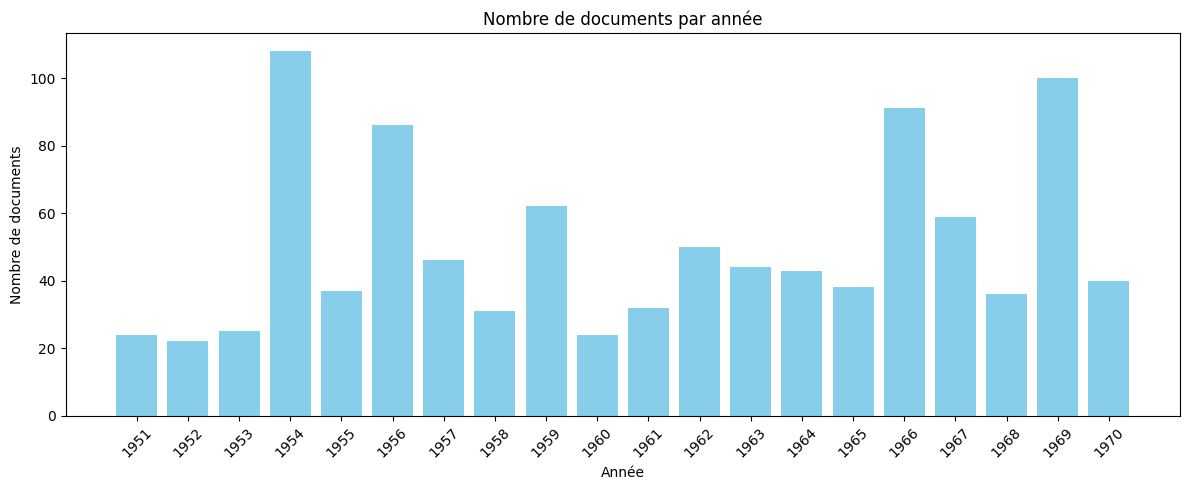

In [30]:
# --- Graphique 1 : Nombre de documents par année ---
years_sorted = sorted(covered_years)  # années couvertes triées
counts_per_year = [sum(1 for f in files if f.startswith("KB_") and f.endswith(".txt") and f.split("_")[2].split("-")[0] == y) for y in years_sorted]

plt.figure(figsize=(12, 5))
plt.bar(years_sorted, counts_per_year, color='skyblue')
plt.xlabel("Année")
plt.ylabel("Nombre de documents")
plt.title("Nombre de documents par année")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Quelques statistiques

In [31]:
# Nombre d'articles par journal
print("Nombre d'articles par journal :")
for j, c in count_newspapers.items():
    print(f"{journal_names.get(j, j)}: {c}")

# Nombre d'articles par décennie
print("\nNombre d'articles par décennie :")
for d, c in count_decade.items():
    print(f"{d}: {c}")

# Nombre d'articles par mois
print("\nNombre d'articles par mois :")
for m, c in sorted(count_month.items()):
    print(f"Mois {m}: {c}")


Nombre d'articles par journal :
Le Soir: 998

Nombre d'articles par décennie :
1950s: 441
1960s: 517
1970s: 40

Nombre d'articles par mois :
Mois 1: 54
Mois 2: 74
Mois 3: 79
Mois 4: 88
Mois 5: 81
Mois 6: 93
Mois 7: 93
Mois 8: 86
Mois 9: 88
Mois 10: 64
Mois 11: 88
Mois 12: 110
